# Bismillah

## 1. Define the Problem

- Predict the income based on different parameters.

## 2. Gather and Prepare Data

- Data Collection:
- Data Cleaning:
- Data Exploration and Visualization:

##### Data Cleaning

In [5]:
## Necessary libraries

import pandas as pd
import numpy as np

In [6]:
# Downloaded from Kaggle.com

df = pd.read_csv("adult.csv")

In [7]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [8]:
df.shape

(32561, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### Data Cleaning

In [10]:
# Check Missing values

df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [11]:
# But dataset contains '?', which is nothing but the missing value.
# So drop it

In [12]:
df['workclass'].replace("?", pd.NA, inplace=True)
df['occupation'].replace("?", pd.NA, inplace=True)

In [13]:
df.dropna()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [14]:
# Check duplicates and remove them

df.duplicated().sum()

24

In [15]:
df = df.drop_duplicates()

##### EDA and Visualization

In [16]:
import seaborn as sb

> Univariate analysis

In [17]:
# Seprate Numerical and Categorical columns

numerical_columns = []
categorical_columns =[]

for col in df.columns:
    if df[col].dtypes=='int64':
        numerical_columns.append(col)
    else:
        categorical_columns.append(col)

In [18]:
numerical_columns

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

<AxesSubplot:xlabel='age', ylabel='Density'>

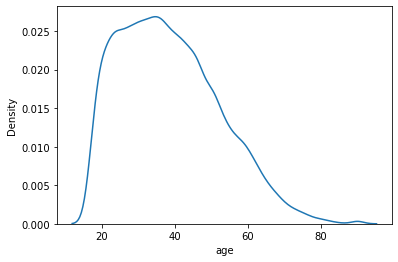

In [19]:
sb.kdeplot(df['age'])

<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

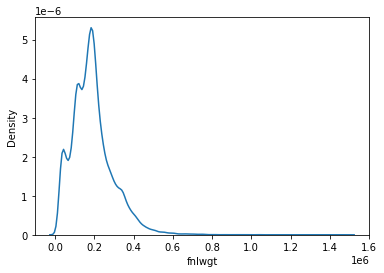

In [20]:
sb.kdeplot(df['fnlwgt'])

<AxesSubplot:xlabel='education.num', ylabel='Density'>

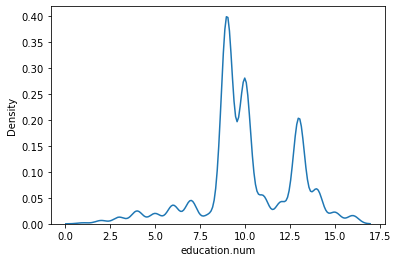

In [21]:
sb.kdeplot(df['education.num'])

<AxesSubplot:xlabel='capital.gain', ylabel='Density'>

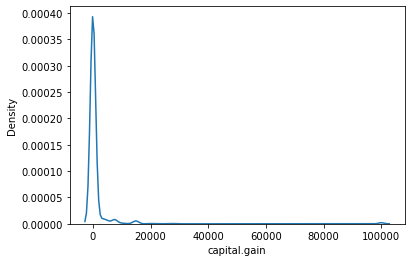

In [22]:
sb.kdeplot(df['capital.gain'])

<AxesSubplot:xlabel='capital.loss', ylabel='Density'>

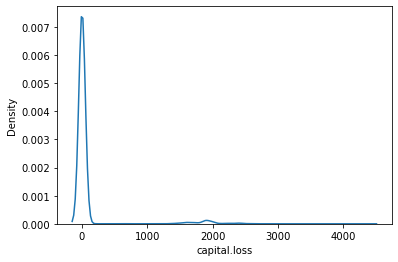

In [23]:
sb.kdeplot(df['capital.loss'])

<AxesSubplot:xlabel='hours.per.week', ylabel='Density'>

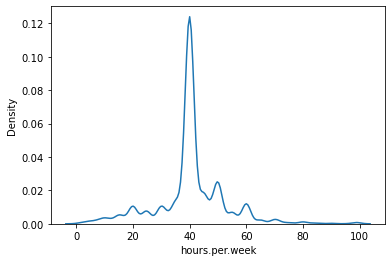

In [24]:
sb.kdeplot(df['hours.per.week'])

<AxesSubplot:ylabel='None'>

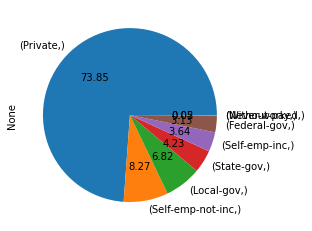

In [25]:
df[['workclass']].value_counts().plot(kind='pie', autopct='%.2f')
    

In [26]:
df['education'].value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [27]:
df['marital.status'].value_counts()

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [28]:
df['occupation'].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [29]:
df['race'].value_counts()

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [30]:
df['sex'].value_counts()

Male      21775
Female    10762
Name: sex, dtype: int64

In [31]:
df['native.country'].value_counts()

United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [32]:
df['relationship'].value_counts()

Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [33]:
df['income'].value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

> Bi variate analysis

In [34]:
# sb.pairplot(df, hue='income')

#### Conclusion

- Drop columns= ['capital.loss', 'capital.gain', 'education']
- Very low amount of missing values in columns = ['occupation', 'workclass'], So, drop that rows.
- Adjust columns = ['race', 'native.country','marital.status']
- Data distributed in non-linear pattern, so linear model will not work accurately.
- Label encode the 'income' column

In [35]:
# Drop columns= ['capital.loss', 'capital.gain', 'education']

df.drop(['education','capital.loss','capital.gain'], axis=1, inplace=True)

C:\Users\ATIQ MANSOORI\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
hours.per.week       0
native.country       0
income               0
dtype: int64

In [37]:
# Very low amount of missing values in columns = ['occupation', 'workclass'], So, drop that rows.

df.dropna(inplace=True)

C:\Users\ATIQ MANSOORI\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [38]:
# Adjust columns = ['race', 'native.country','marital.status']


replacement_dict = {'Black': 'Other', 'Asian-Pac-Islander': 'Other', 'Amer-Indian-Eskimo': 'Other'}
df['race'].replace(replacement_dict, inplace=True)

replacement_dict = {'Married-civ-spouse': 'Married', 'Married-spouse-absent': 'Married', 'Married-AF-spouse': 'Married', 'Never-married': 'Single', 'Divorced': 'Single', 'Separated': 'Single', 'Widowed': 'Single'}
df['marital.status'].replace(replacement_dict, inplace=True)

replacement_dict = {'Local-gov': 'Government', 'State-gov': 'Government', 'Federal-gov': 'Government', 'Self-emp-not-inc': 'Self-emp', 'Self-emp-inc': 'Self-emp'}
df['workclass'].replace(replacement_dict, inplace=True)



C:\Users\ATIQ MANSOORI\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [39]:
values_to_replace = ['?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'Hungary', 'Columbia', 'Guatemala', 'El-Salvador',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)', 'Scotland']

# New value to replace the old values
new_value = 'Other'

# Replace the specified values with the new value
df['native.country'] = df['native.country'].replace(values_to_replace, new_value)

C:\Users\ATIQMA~1\AppData\Local\Temp/ipykernel_14932/2717665657.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['native.country'] = df['native.country'].replace(values_to_replace, new_value)


In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
label = LabelEncoder()

In [42]:
df['income'] = label.fit_transform(df['income'])

C:\Users\ATIQMA~1\AppData\Local\Temp/ipykernel_14932/3204632391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'] = label.fit_transform(df['income'])


In [43]:
df

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
1,82,Private,132870,9,Single,Exec-managerial,Not-in-family,White,Female,18,United-States,0
3,54,Private,140359,4,Single,Machine-op-inspct,Unmarried,White,Female,40,United-States,0
4,41,Private,264663,10,Single,Prof-specialty,Own-child,White,Female,40,United-States,0
5,34,Private,216864,9,Single,Other-service,Unmarried,White,Female,45,United-States,0
6,38,Private,150601,6,Single,Adm-clerical,Unmarried,White,Male,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,Single,Protective-serv,Not-in-family,White,Male,40,United-States,0
32557,27,Private,257302,12,Married,Tech-support,Wife,White,Female,38,United-States,0
32558,40,Private,154374,9,Married,Machine-op-inspct,Husband,White,Male,40,United-States,1
32559,58,Private,151910,9,Single,Adm-clerical,Unmarried,White,Female,40,United-States,0


In [44]:
df.to_csv("adult_data.csv", header=True, index=False)

## 3. Feature Engineering

- Feature Transformation
- Feature Selection 

##### Feature Transformation 

- Encoding categorical columns
- Apply Scaling and Transform functions to numerical columns

In [45]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, RobustScaler, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer

##### Pipeline : Missing value --> Encoding Categorical Columns --> Scaling --> Feature Selection --> Model

- Currently no missing value in dataset, So skip Missing value imputing

- Apply Ordinal Encodeing to 'workclass'
- Apply Label Encoding to 'income'
- Apply OneHot Encoding to 'race', 'sex', 'native.country', 'relationship', 'marital.status'


In [46]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'hours.per.week',
       'native.country', 'income'],
      dtype='object')

In [47]:
# Encoding

# Order of 'workclass' {without pay < self-emp < Govt < Private}

transformer1 = ColumnTransformer([
    ('order_workclass', OrdinalEncoder(categories=[['Without-pay','Self-emp','Government','Private']]),[1]),
], remainder='passthrough')


In [48]:
# 'occupation','race', 'sex', 'native.country', 'relationship', 'marital.status'

transformer2 = ColumnTransformer([
    ('onehot_encoding', OneHotEncoder(sparse=False, drop='first'), [4,5,6,7,8,10])
], remainder='passthrough')


In [49]:
# Apply Power Transform to all numerical columns

transformer3 = ColumnTransformer([
    ('scale_transform', PowerTransformer(),[0, 2, 3, 9])
], remainder='passthrough')


##### Feature Selection 

- Select the top best columns


In [2]:
from sklearn.feature_selection import SelectKBest

### Pipeline

In [3]:
from sklearn.pipeline import Pipeline 

In [50]:
pipeline = Pipeline([
    ('order_workclass', transformer1),
    ('onehot_encoding', transformer2),
    ('scale_transform', transformer3),
])

> ## Make a pickle file of 'pipe 

In [51]:
import pickle

In [53]:
pickle.dump(pipeline,open('pipeline.pkl','wb'))